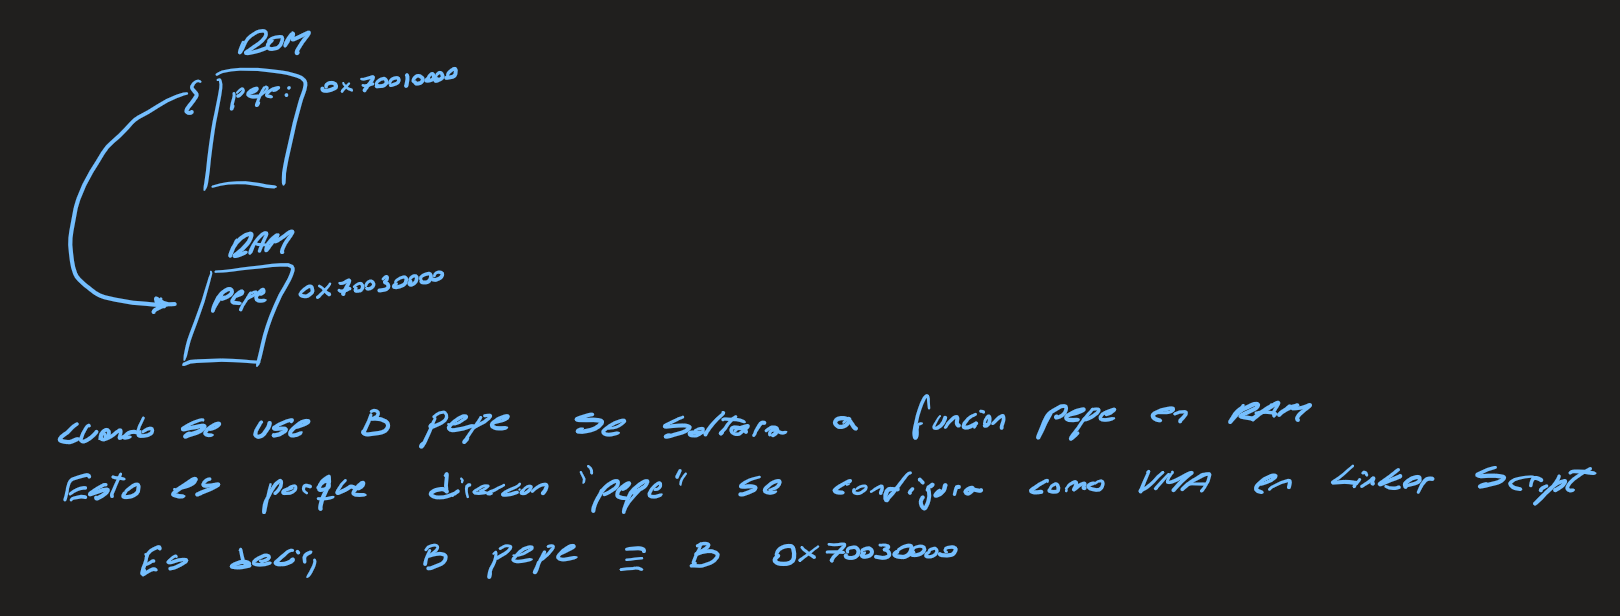

Nuetro codigo comienza en una seccion de ROM (Memoria Flash del Microprocesador). Para que sea mas rapida la ejecucion de codigo, se copia codigo y datos inicializados hacia RAM

La seccion de ROM comienza en _PUBLIC_ROM_INIT = 0x70010000; 
Se va a copiar en _PUBLIC_RAM_INIT = 0x70030000;

Notar que B _start lleva a direccion en RAM porque el Linker definio _PUBLIC_RAM_INIT = 0x70030000;

la instrccion B _start se traduce en el disassembly como:
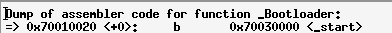

De esta manera, se empieza a ejecutar en VMA, es decir, su seccion en RAM

## Antes de td3_memcopy

ROM

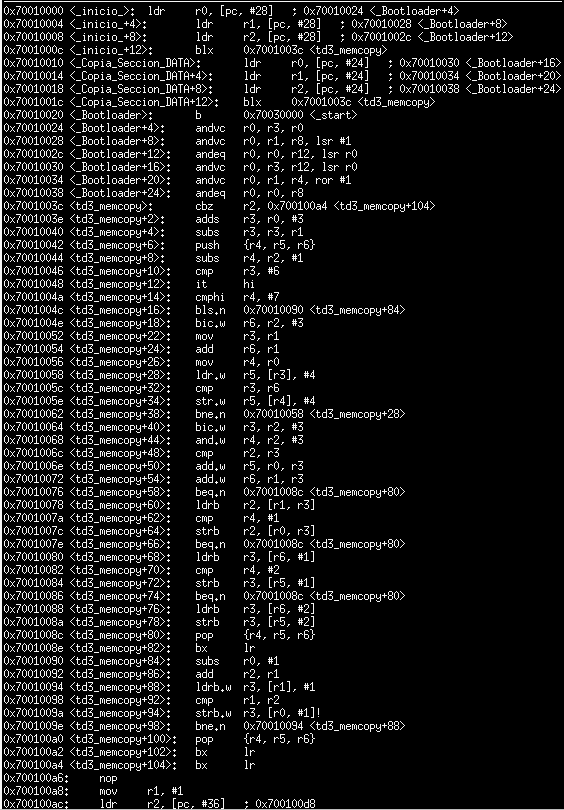

RAM sin inicializar

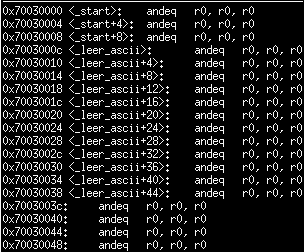

## Despues de Td3_memcopy

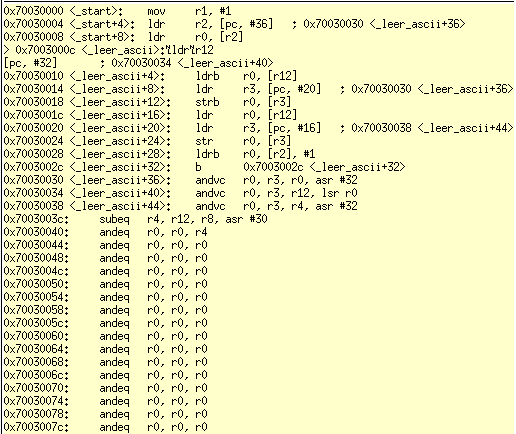

### Utilizacion de seccion inicializada y .bss

In [ ]:
_leer_ascii:
      LDR R12, =asciz_string      // Posicion del string
      LDRB R0, [R12]              // guardar 1er caracter
      LDR R3, =argumento
      STRB R0, [R3]              // poner 1er caracter en argumento

      LDR R0, [R12]              // guardar string
      LDR R3, =factorial
      STR R0, [R3]

      LDRB R0, [R2], #1

      B .

guardando char en argumento

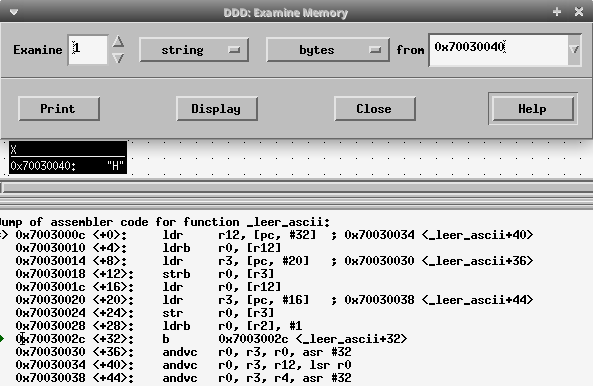

guardando string en .bss 

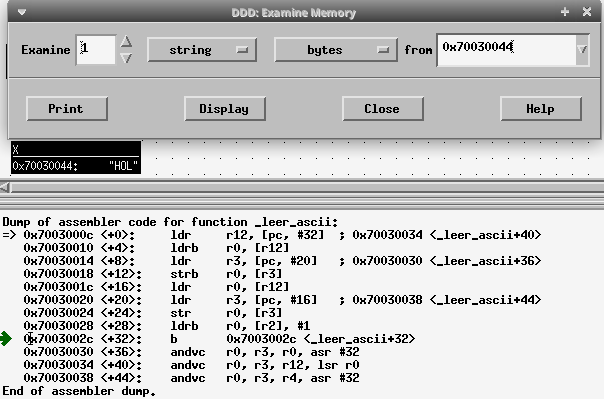

#### STACK

el stack es de 4K (0x1000), empieza en 0x70020000 y el final esta en 0x70021000
utilizacion de Stack (direccion 0x70021000)


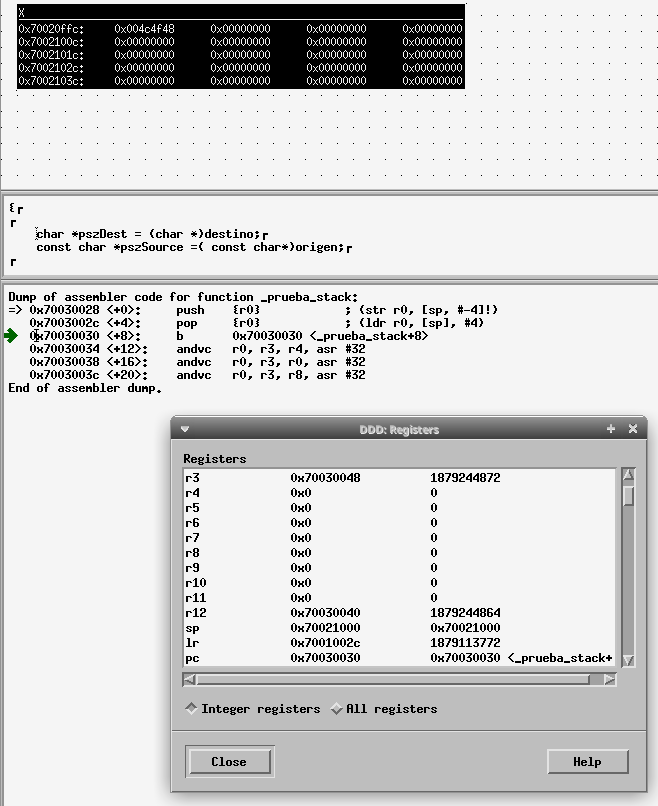

### LINKER SCRIPT

Queda comprimidas las secciones y se ahorra en binario

In [ ]:
    .inicio _PUBLIC_ROM_INIT : AT (_PUBLIC_ROM_INIT) 
        { 
        *(.inicio*) 
        } 
    /*  __inicio_fin = . direccion donde termina seccion 'inicio' */


   /*. = _PUBLIC_RAM_INIT; seccion 'text' tiene VMA=0x70030000 (lugar en RAM donde se va a ejecutar) */
   /*  .text : AT(__inicio_fin) /* Definimos LMA de seccion 'text' a continuacion de seccion 'inicio' */
    .text _PUBLIC_RAM_INIT : AT( _PUBLIC_ROM_INIT +SIZEOF(.inicio)) /* AT: Definimos LMA de seccion 'text' a continuacion de seccion 'inicio' */
        { 
        *(.text*) 
        } 
    _SECTION_TEXT_LMA = LOADADDR (.text) ; /* LMA de .text  */

    .data _PUBLIC_RAM_INIT + SIZEOF(.text) : AT( _PUBLIC_ROM_INIT +SIZEOF(.inicio)+SIZEOF(.text))
        { 
        *(.data*) 
        } > public_ram
    _SECTION_DATA_LMA = LOADADDR (.data) ; /* LMA de .text  */

    .bss _PUBLIC_RAM_INIT + SIZEOF(.text)  + SIZEOF(.data) : AT( _PUBLIC_ROM_INIT +SIZEOF(.inicio) + SIZEOF(.text) + SIZEOF(.data))
        {
        . = ALIGN(4);
        __bss_start__ = .;
        *(.bss*)
        __bss_end__ = .;
        } > public_ram
    /* queda comprimidas las secciones y se ahorra en binario*/

Probamos Stack de una excepcion:
Para el ejemplo probamos el Stack de SVC_Handler (se puede ver la direccion de inicio en .lst)

Viendo el .lst se ve que el Linker dejo SVC_Stack = 0x7002 1180

Al hacer PUSH { R10, R12} se guarda de la siguiente forma:

[0x7002 117C] = R12

[0x7002 1178] = R10

Se ve que se empieza a llenar el stack desde SVC_Stack-4Bytes = 0x7002 117C

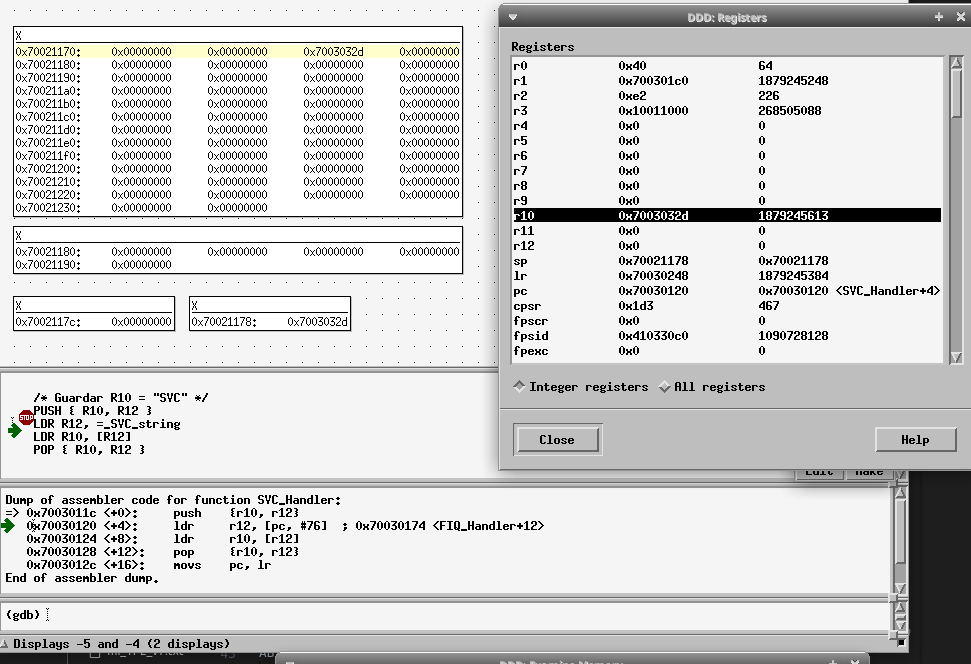